<a href="https://colab.research.google.com/github/Rakeshkomminen/Machine-Learning/blob/main/Predition_of_Marks_Based_on_Hours_of_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Problem Statement
   In this data, we have one independent variable (Features) "Hours of Study" and one dependent variable (Target) "Marks". You have to train LinearRegression and  SVR models to understand the relationship between the Hours of Study and Marks of the student to predict the student's marks based on their number of hours dedicated to studies.Find the best Model for this Dataset Among them?



# Importing the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

# EDA

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
df.tail()

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [ ]:
df.shape

(100, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [ ]:
df.columns

Index(['Hours of Study', 'Marks'], dtype='object')

In [ ]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [ ]:
df.rename(columns={'Hours of Study':'Hours'},inplace=True)

In [ ]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


Text(0.5, 1.0, 'Hours v/s Marks')

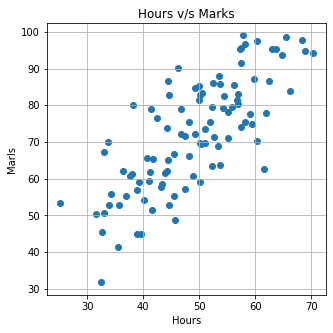

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df['Hours'],df['Marks'])
plt.xlabel('Hours')
plt.ylabel('Marls')
plt.grid()
plt.title('Hours v/s Marks')

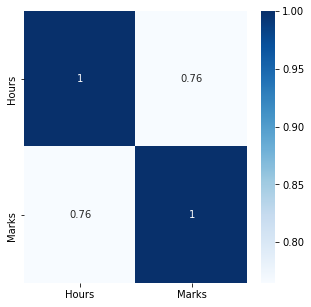

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True, cmap='Blues')

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [ ]:
y

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

# Splitting the data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
len(X_train)

80

In [ ]:
len(X_test)

20

In [ ]:
len(y_train)

80

In [ ]:
len(y_test)

20

# Model Selection - LinearRegression

In [ ]:
model = LinearRegression()

# Fitting/train the data

In [ ]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_

16.25446784809329

In [ ]:
model.coef_

array([1.12752619])

# Prediction

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([80.41207787, 81.41220408, 81.83651036, 80.37564294, 68.38109353,
       84.24128327, 86.0440802 , 54.96596525, 56.48245325, 60.85703764,
       93.78963446, 58.73475556, 62.90893834, 62.03151082, 66.43224519,
       64.10270716, 56.35812788, 87.28577752, 79.17689396, 67.46640328])

In [ ]:
y_test

array([80.20752314, 99.05141484, 96.76956643, 83.14274979, 90.12357207,
       97.37989686, 77.76848242, 55.72348926, 52.72173496, 44.86249071,
       94.85387123, 60.81024665, 79.10282968, 65.56230126, 65.10171157,
       76.61734128, 41.4128853 , 95.2441528 , 79.55043668, 55.16567715])

# Testing the model

In [ ]:
model.score(X_test,y_test)

0.625096040084407

In [ ]:
r2_score(y_test,y_pred)

0.625096040084407

In [ ]:
mean_absolute_error(y_test,y_pred)

8.575043581614436

In [ ]:
mean_squared_error(y_test,y_pred)

120.14508679930717

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

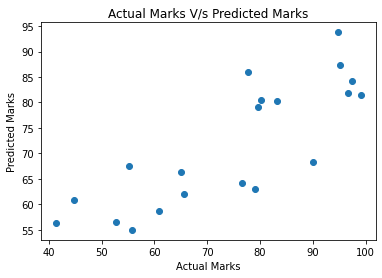

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual Marks V/s Predicted Marks')

#  Model Selection - SVR



In [ ]:
model1 = SVR(kernel='rbf')

# Splitting

In [ ]:
U_train,U_test,v_train,v_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
len(U_train)

80

In [ ]:
len(U_test)

20

In [ ]:
len(v_train)

80

In [ ]:
len(v_test)

20

# Fitting

In [ ]:
model1.fit(U_train,v_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Prediction

In [ ]:
y_pred1 = model1.predict(U_test)

In [ ]:
y_pred1

array([77.12833601, 77.33818573, 77.40818091, 77.11939861, 67.68248736,
       77.63259556, 77.64596682, 62.2889095 , 61.79478068, 61.74226758,
       76.18406685, 61.46371529, 62.64686835, 62.18188133, 65.56460817,
       63.4602303 , 61.82833569, 77.58630212, 76.76827737, 66.66208786])

In [ ]:
U_test

array([[56.9012147 ],
       [57.78822399],
       [58.16454011],
       [56.86890066],
       [46.2309665 ],
       [60.29732685],
       [61.89622268],
       [34.3331247 ],
       [35.67809389],
       [39.55790122],
       [68.76573427],
       [37.67565486],
       [41.37772653],
       [40.59953838],
       [44.50253806],
       [42.43647694],
       [35.56783005],
       [62.99748075],
       [55.80573336],
       [45.41973014]])

# Testing

In [ ]:
model.score(U_test,v_test)

0.625096040084407

In [ ]:
r2_score(v_test,y_pred1)

0.3963454248795293

In [ ]:
mean_absolute_error(v_test,y_pred1)

11.506891517821995

In [ ]:
mean_squared_error(v_test,y_pred1)

193.45256139992915

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

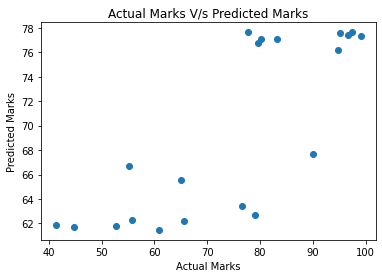

In [ ]:
plt.scatter(v_test,y_pred1)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual Marks V/s Predicted Marks')

# Feature Scalling
  --> Standardization
  
  --> Normalisation

In [ ]:
stand = StandardScaler()

In [ ]:
X = stand.fit_transform(X.reshape(-1,1))
y = stand.fit_transform(y.reshape(-1,1))

In [ ]:
X

array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

In [ ]:
y

array([[-2.66651176],
       [-0.21538463],
       [-0.62633786],
       [-0.03229448],
       [ 1.00475931],
       [ 0.40839133],
       [ 0.50297376],
       [-0.85054551],
       [ 0.21794595],
       [-0.04854375],
       [-1.11541194],
       [ 0.69054936],
       [-0.66293287],
       [ 0.22202084],
       [ 0.62160848],
       [-0.74791896],
       [ 0.71790058],
       [ 1.67581471],
       [-1.5331961 ],
       [-1.00224427],
       [ 0.78309945],
       [ 1.75590787],
       [-0.9774751 ],
       [-1.3649464 ],
       [ 0.22121292],
       [ 0.180543  ],
       [ 1.54854301],
       [ 1.53362047],
       [ 0.46399128],
       [ 0.75357708],
       [-0.57367894],
       [-2.02475385],
       [ 0.3029835 ],
       [ 1.63545934],
       [ 0.13548623],
       [-0.36015233],
       [ 0.37909756],
       [-1.40938966],
       [-0.65528619],
       [-0.74219   ],
       [-1.27956897],
       [-0.89032789],
       [ 0.71879173],
       [-0.70156137],
       [ 1.53459818],
       [-1

# Splitting

In [ ]:
A_train,A_test,b_train,b_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
len(A_train)

80

In [ ]:
len(A_test)

20

In [ ]:
len(b_train)

80

In [ ]:
len(b_test)

20

# Model Selection - LinearRegression

In [ ]:
model2 = LinearRegression()

# Fitting

In [ ]:
model2.fit(A_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction

In [ ]:
y_pred2 = model2.predict(A_test)

In [ ]:
y_pred2

array([[ 0.5538935 ],
       [ 0.62002238],
       [ 0.64807773],
       [ 0.5514844 ],
       [-0.24160158],
       [ 0.8070826 ],
       [ 0.92628449],
       [-1.128617  ],
       [-1.028346  ],
       [-0.73909616],
       [ 1.43842466],
       [-0.87942258],
       [-0.60342339],
       [-0.66143937],
       [-0.37046047],
       [-0.52449076],
       [-1.03656646],
       [ 1.00838618],
       [ 0.47222248],
       [-0.30208139]])

In [ ]:
b_test

array([[ 0.54036823],
       [ 1.78633637],
       [ 1.63545934],
       [ 0.73444698],
       [ 1.19602266],
       [ 1.67581471],
       [ 0.37909756],
       [-1.07852911],
       [-1.2770067 ],
       [-1.79666411],
       [ 1.50879256],
       [-0.74219   ],
       [ 0.46732531],
       [-0.42798163],
       [-0.45843606],
       [ 0.3029835 ],
       [-2.02475385],
       [ 1.53459818],
       [ 0.49692133],
       [-1.11541194]])

# Testing

In [ ]:
model2.score(A_test,b_test)

0.6250960400844071

In [ ]:
r2_score(b_test,y_pred2)

0.6250960400844071

In [ ]:
mean_absolute_error(b_test,y_pred2)

0.5669864413684

In [ ]:
mean_squared_error(b_test,y_pred2)

0.5252652747818947

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

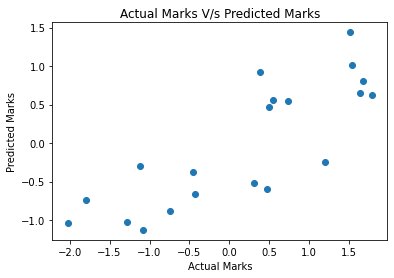

In [ ]:
plt.scatter(b_test,y_pred2)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual Marks V/s Predicted Marks')

# splitting

In [ ]:
C_train,C_test,d_train,d_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
len(C_train)

80

In [ ]:
len(C_test)

20

In [ ]:
len(d_train)

80

In [ ]:
len(d_test)

20

# Model Selection - SVR

In [ ]:
model3 = SVR(kernel='rbf')

# Fitting

In [ ]:
model3.fit(C_train,d_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Prediction

In [ ]:
y_pred3 = model3.predict(C_test)

In [ ]:
y_pred3

array([ 0.53068774,  0.58464841,  0.61070192,  0.52889267, -0.3429912 ,
        0.80040515,  0.98395476, -1.17516879, -1.08713409, -0.87316807,
        1.48185483, -0.9691691 , -0.77539666, -0.81947469, -0.53025657,
       -0.70619912, -1.09420197,  1.1190305 ,  0.4745374 , -0.43455754])

In [ ]:
d_test

array([[ 0.54036823],
       [ 1.78633637],
       [ 1.63545934],
       [ 0.73444698],
       [ 1.19602266],
       [ 1.67581471],
       [ 0.37909756],
       [-1.07852911],
       [-1.2770067 ],
       [-1.79666411],
       [ 1.50879256],
       [-0.74219   ],
       [ 0.46732531],
       [-0.42798163],
       [-0.45843606],
       [ 0.3029835 ],
       [-2.02475385],
       [ 1.53459818],
       [ 0.49692133],
       [-1.11541194]])

# Testing

In [ ]:
model3.score(C_test,d_test)

0.5998873553338905

In [ ]:
r2_score(d_test,y_pred3)

0.5998873553338905

In [ ]:
mean_absolute_error(d_test,y_pred3)

0.5844731004337038

In [ ]:
mean_squared_error(d_test,y_pred3)

0.5605843114902598

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

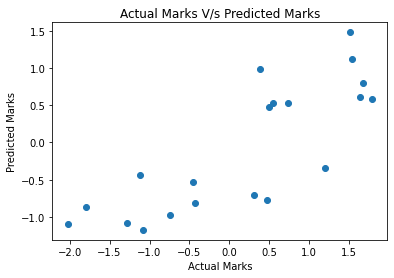

In [ ]:
plt.scatter(d_test,y_pred3)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual Marks V/s Predicted Marks')